In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df=pd.read_csv('loan.csv')

In [3]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
loan_df.shape

(39717, 111)

##### Deleting the columns that have all the null values

In [6]:
loan_df.dropna(axis=1,how='all',inplace= True)
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
loan_df.value_counts('pymnt_plan')

pymnt_plan
n    39717
dtype: int64

In [8]:
loan_df.value_counts('initial_list_status')

initial_list_status
f    39717
dtype: int64

##### Deleting the columns that have same value throughout.

In [9]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [10]:
loan_df.shape

(39717, 48)

In [11]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

##### There are some columns which donot contribute to our analysis such as id,member_id,etc., Thus dropping them.

In [12]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc"],axis=1,inplace= True)

In [13]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'chargeoff_within_12_mths'],
      dtype='object')

##### Now according to our problem statement, we are required to analyse the factors that contribute to loan defaulting. so we will remove the columns that does not give any required information for loan defaulting.

In [14]:
loan_df.drop(["out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [15]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [16]:
loan_df.value_counts('loan_status')

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
dtype: int64

##### As we cannot do anything for the current loan status because they still have time to pay the loan amount, so dropping the rows containing 'current' status.

In [17]:
loan_df=loan_df[loan_df['loan_status'] != 'Current']

In [18]:
loan_df.value_counts('loan_status')

loan_status
Fully Paid     32950
Charged Off     5627
dtype: int64

In [19]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
loan_df['loan_status'].isnull().sum()

0

##### Checking for Null values

In [21]:
loan_df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

##### There are two columns with null values "emp_length" and "revol_util"               

In [22]:
loan_df.value_counts('emp_length')

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
dtype: int64

In [23]:
loan_df.emp_length.mode()[0]

'10+ years'

##### As this mode value is used maximum number of times, thus replacing all the null values in emp_length with this mode value

In [24]:
loan_df['emp_length']=loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

In [25]:
loan_df.emp_length.isnull().sum()

0

In [26]:
loan_df.value_counts('emp_length')

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
dtype: int64

In [27]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isnull().sum()

0

In [28]:
loan_df.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

In [30]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


#####  Formatting the int_rate, emp_length, revol_util columns.

In [31]:
loan_df.int_rate= loan_df.int_rate.apply(lambda x: x[:-1])
loan_df.value_counts('int_rate')

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
21.48      1
20.52      1
16.01      1
18.72      1
16.96      1
Length: 370, dtype: int64

In [32]:
loan_df.int_rate.astype('float32')

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38527, dtype: float32

In [33]:
loan_df.emp_length = loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [34]:
loan_df.value_counts('emp_length')

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
dtype: int64

In [35]:
loan_df.emp_length.astype('int64')

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38527, dtype: int64

In [36]:
loan_df.revol_util= loan_df.revol_util.apply(lambda x: x[:-1])

In [37]:
loan_df.value_counts('revol_util')

revol_util
0        954
63        62
0.20      62
31.20     57
40.70     57
        ... 
21.92      1
34.89      1
0.86       1
26.32      1
21.72      1
Length: 1088, dtype: int64

In [38]:
loan_df.revol_util.astype('float32')

0        83.699997
1         9.400000
2        98.500000
3        21.000000
5        28.299999
           ...    
39712    13.100000
39713    26.900000
39714    19.400000
39715     0.700000
39716    51.500000
Name: revol_util, Length: 38527, dtype: float32

In [39]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12


##### Analysing numerical data for treating OUTLIERS also doing Univariate analysis
- annual_inc
- loan_amnt
- funded_amnt_inv
- dti

##### Analysing annual income outliers

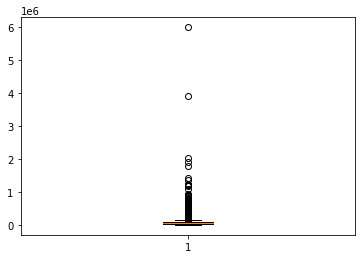

In [40]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

In [41]:
loan_df = loan_df[loan_df.annual_inc <= loan_df['annual_inc'].quantile(0.95)]

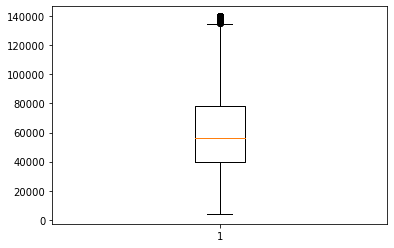

In [42]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

##### Analysing loan_amnt

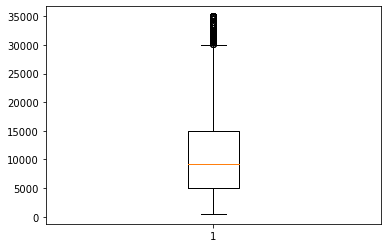

In [43]:
plt.boxplot(loan_df.loan_amnt)
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

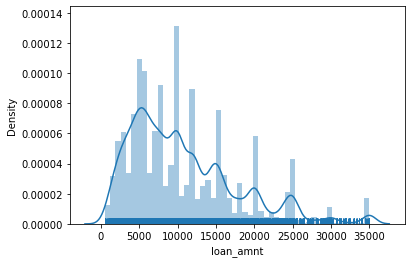

In [44]:
sns.distplot(a=loan_df.loan_amnt, rug=True)

##### From the above two plots we have understood that most of the people have opted for the loan amount of 10000 and a very few people have opted for the loan amount of 30000or more

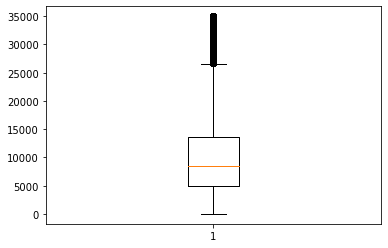

In [45]:
plt.boxplot(loan_df.funded_amnt_inv)
plt.show()

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

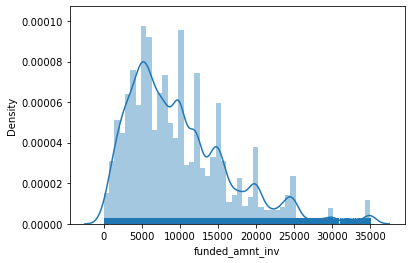

In [46]:
sns.distplot(a=loan_df.funded_amnt_inv, rug=True)

##### Most of the people have been given the loan amount around 5000 also most of the applied loans have been approved

### Analysing dti

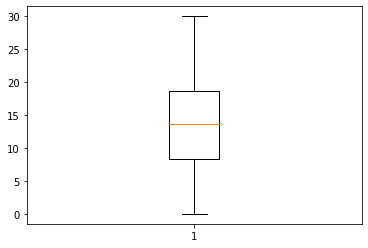

In [47]:
plt.boxplot(loan_df.dti)
plt.show()

<AxesSubplot:xlabel='dti', ylabel='Density'>

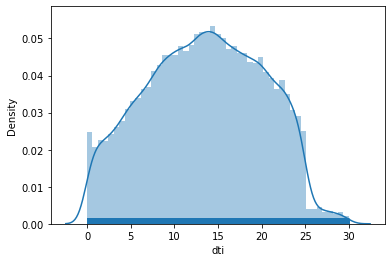

In [48]:
sns.distplot(a=loan_df.dti, rug=True)

#####  There are no outliers in dti columns and even if there are outliers in loan_amnt and funded_amnt_inv, they are very close to each other and does not have any extreme outliers so we won't change these columns.

### Analysing annual income.

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

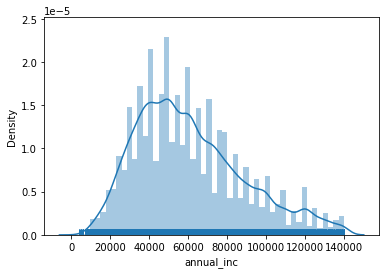

In [49]:
sns.distplot(a=loan_df.annual_inc, rug=True)

In [51]:
loan_df.annual_inc.describe()

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64

#####  As seen in the above plot, most of the applicants have salary around 56000

In [52]:
loan_df.term=loan_df.term.apply(lambda x: x.replace('months',''))
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12


In [53]:
loan_df.term = loan_df.term.astype('int64')

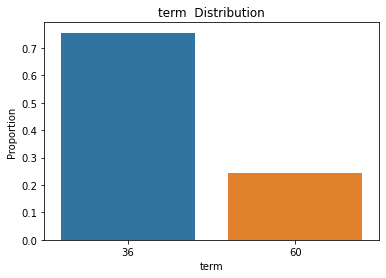

In [54]:

prob_df = loan_df['term'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term '+' Distribution')
plt.show()

#####  It is observed that most of the applicants have applied for the term period of 36 months

### Grade distribution

In [55]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))

In [56]:
loan_df.value_counts('sub_grade')

sub_grade
4    7679
3    7545
5    7430
2    7254
1    6698
dtype: int64

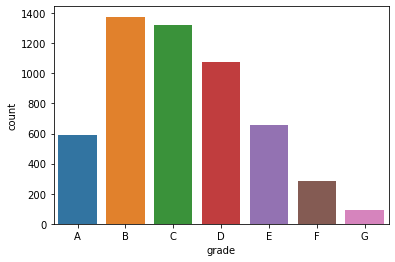

In [57]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

##### most of the applicants fall under B and C grade

###  Sub_grade distribution

<AxesSubplot:xlabel='grade', ylabel='count'>

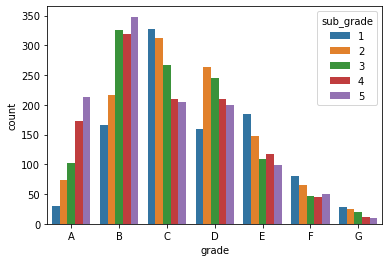

In [58]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])


In [59]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### Loan status distribution

In [60]:
loan_df.loan_status=loan_df.loan_status.astype('string')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

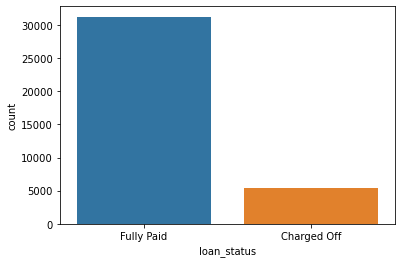

In [61]:
sns.countplot(x = 'loan_status', data = loan_df)

##### Most of the applicants have paid the loan amount

##### Home ownership distribution.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

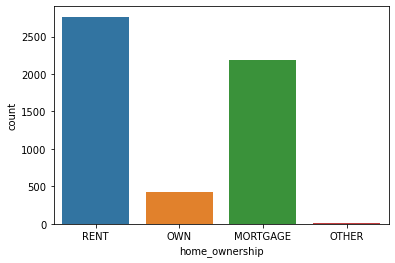

In [62]:
sns.countplot(x = 'home_ownership', data =  loan_df[loan_df.loan_status == 'Charged Off'])


##### Most of the applicants either live in Rent house or have mortgage houses.

### Employee length distribution.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

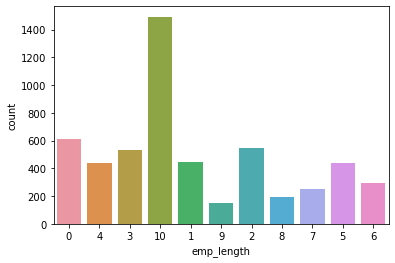

In [63]:
sns.countplot(x = 'emp_length', data =  loan_df[loan_df.loan_status == 'Charged Off'])


#####  Most of the applicants have 10+ years of working experience

### Verification status distribution

<AxesSubplot:xlabel='verification_status', ylabel='count'>

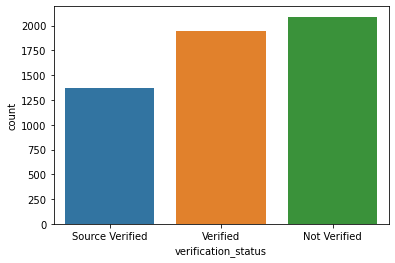

In [64]:
sns.countplot(x = 'verification_status', data =  loan_df[loan_df.loan_status == 'Charged Off'])


##### Majority of loans that are defaulted, are issued without verification of applicants income

### Purpose distribution

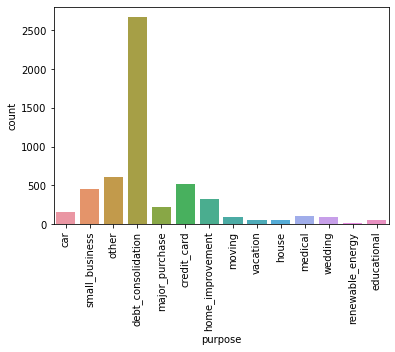

In [65]:
sns.countplot(x = 'purpose', data =  loan_df[loan_df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

##### Most of the charged off applicants are buying loans for debt consolidation

### Segmented Univariate analysis

##### Loan amount

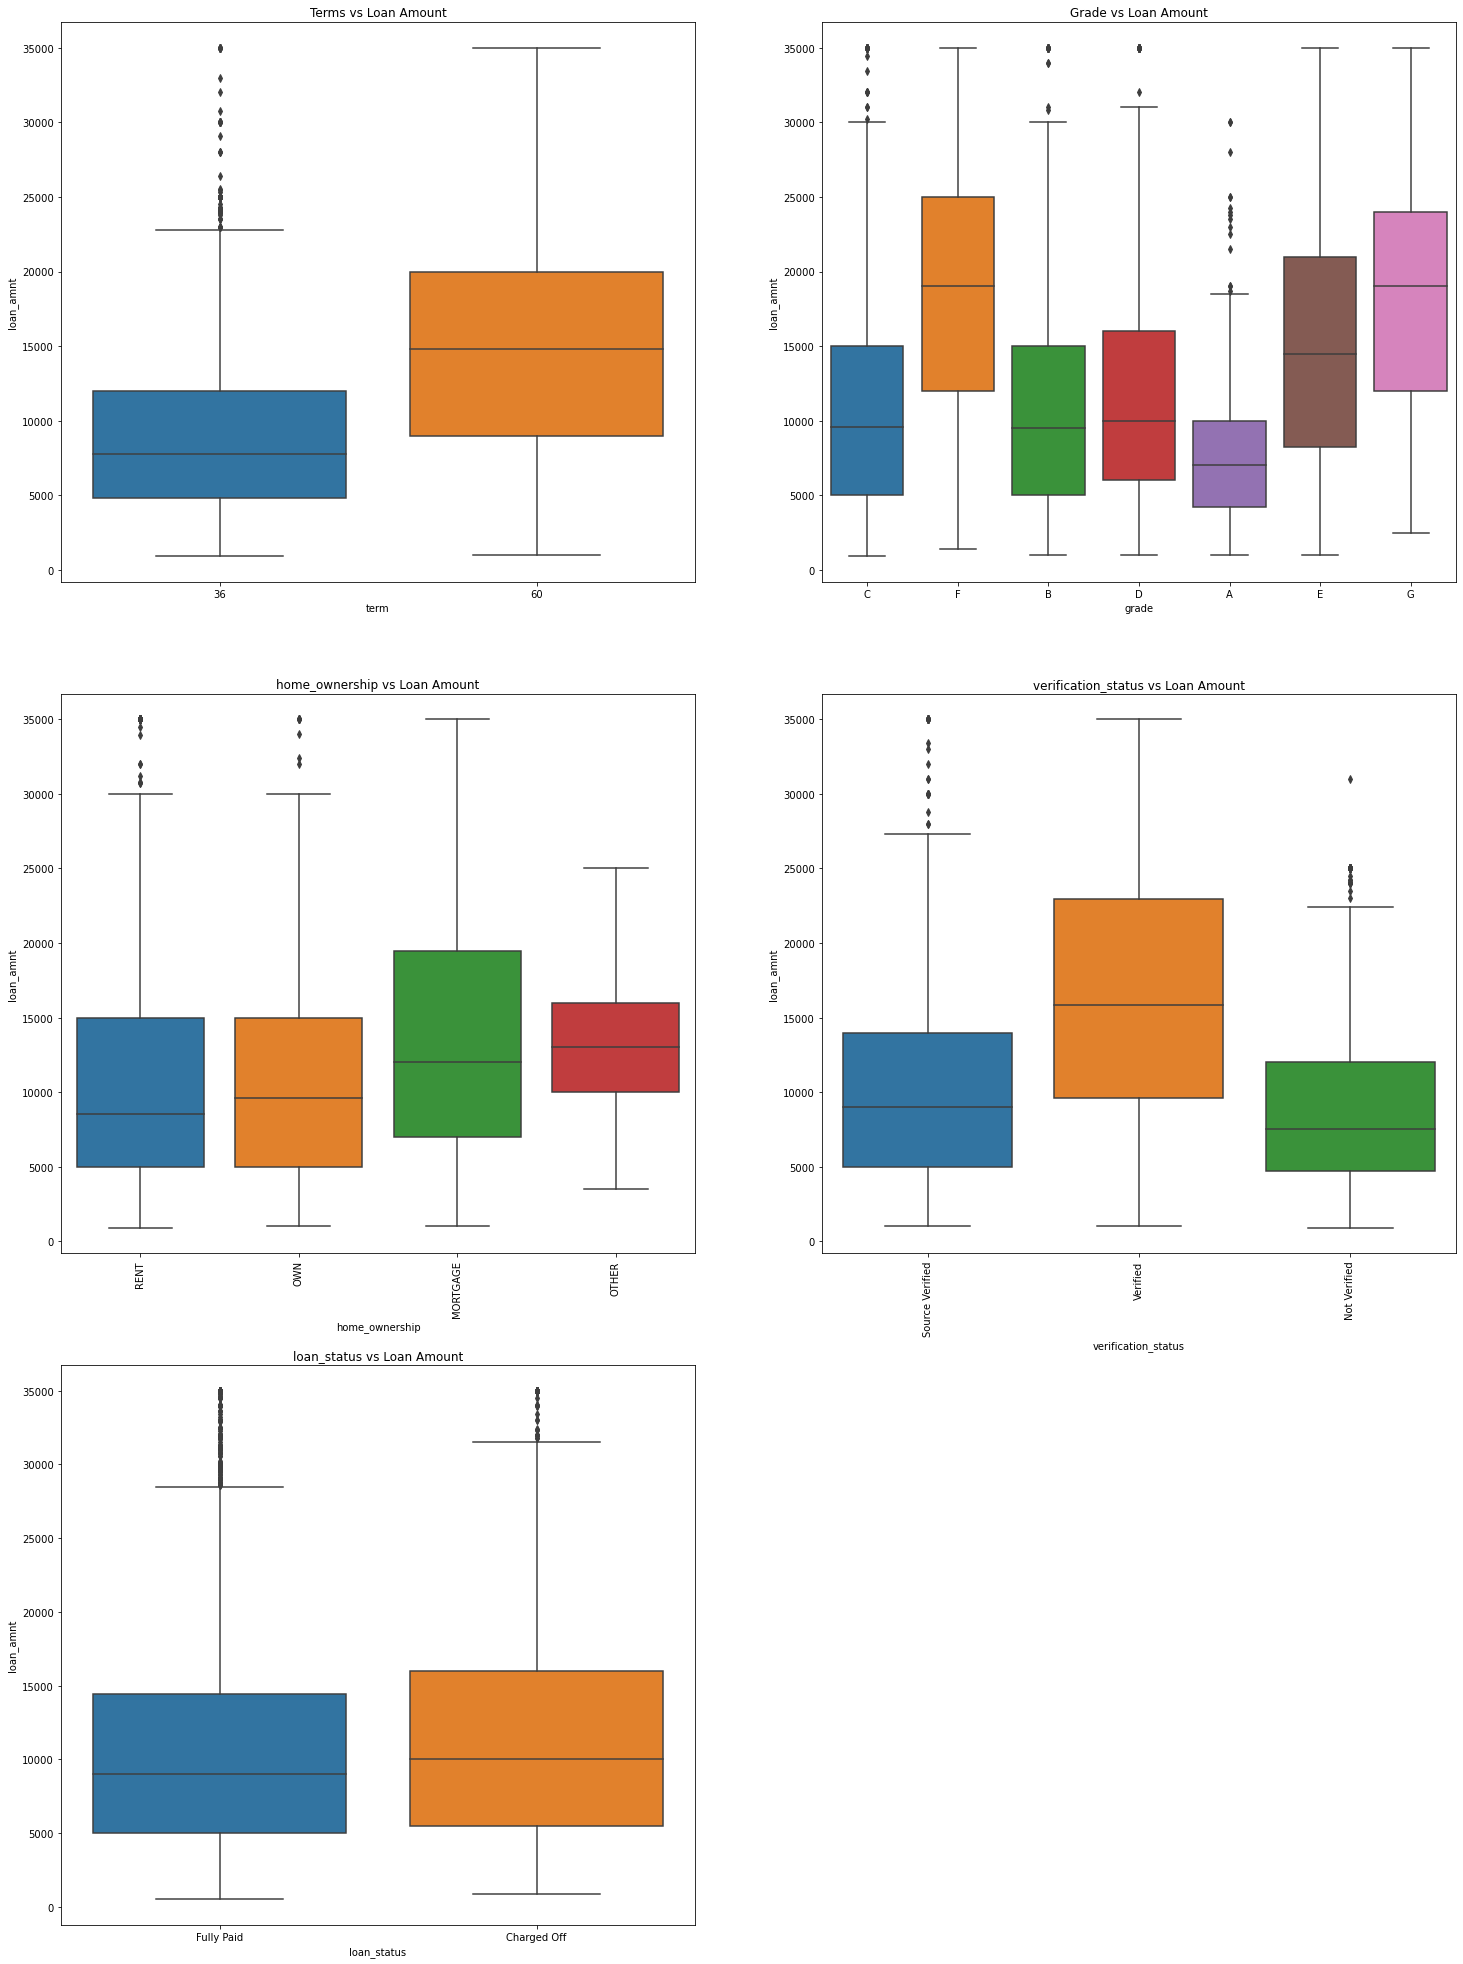

In [66]:
plt.figure(figsize=(25,35))

plt.subplot(321)
sns.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Terms vs Loan Amount')
plt.subplot(322)
sns.boxplot(x='grade', y=loan_df.loan_amnt, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Grade vs Loan Amount')
plt.subplot(323)
sns.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('home_ownership vs Loan Amount')
plt.xticks(rotation=90)
plt.subplot(324)
plt.title('verification_status vs Loan Amount')
sns.boxplot(x='verification_status', y=loan_df.loan_amnt, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.subplot(325)
sns.boxplot(x='loan_status', y=loan_df.loan_amnt, data=loan_df)
plt.title('loan_status vs Loan Amount')
plt.show()

###### Analysis:
- Higher the loan amount, higher the term.
- Grade F and G have the highest loan amount which means that as the grades are decreasing , the loan amount is increasing
- Applicants living in Mortgage have taken the higher loan amount.
- The company has not verified the income for applicants with lower loan amount(<10000)
- Most of the applicants whose loan amount is greater than 10000 were not able to pay the loan amount on time.

##### Funded amount

In [67]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

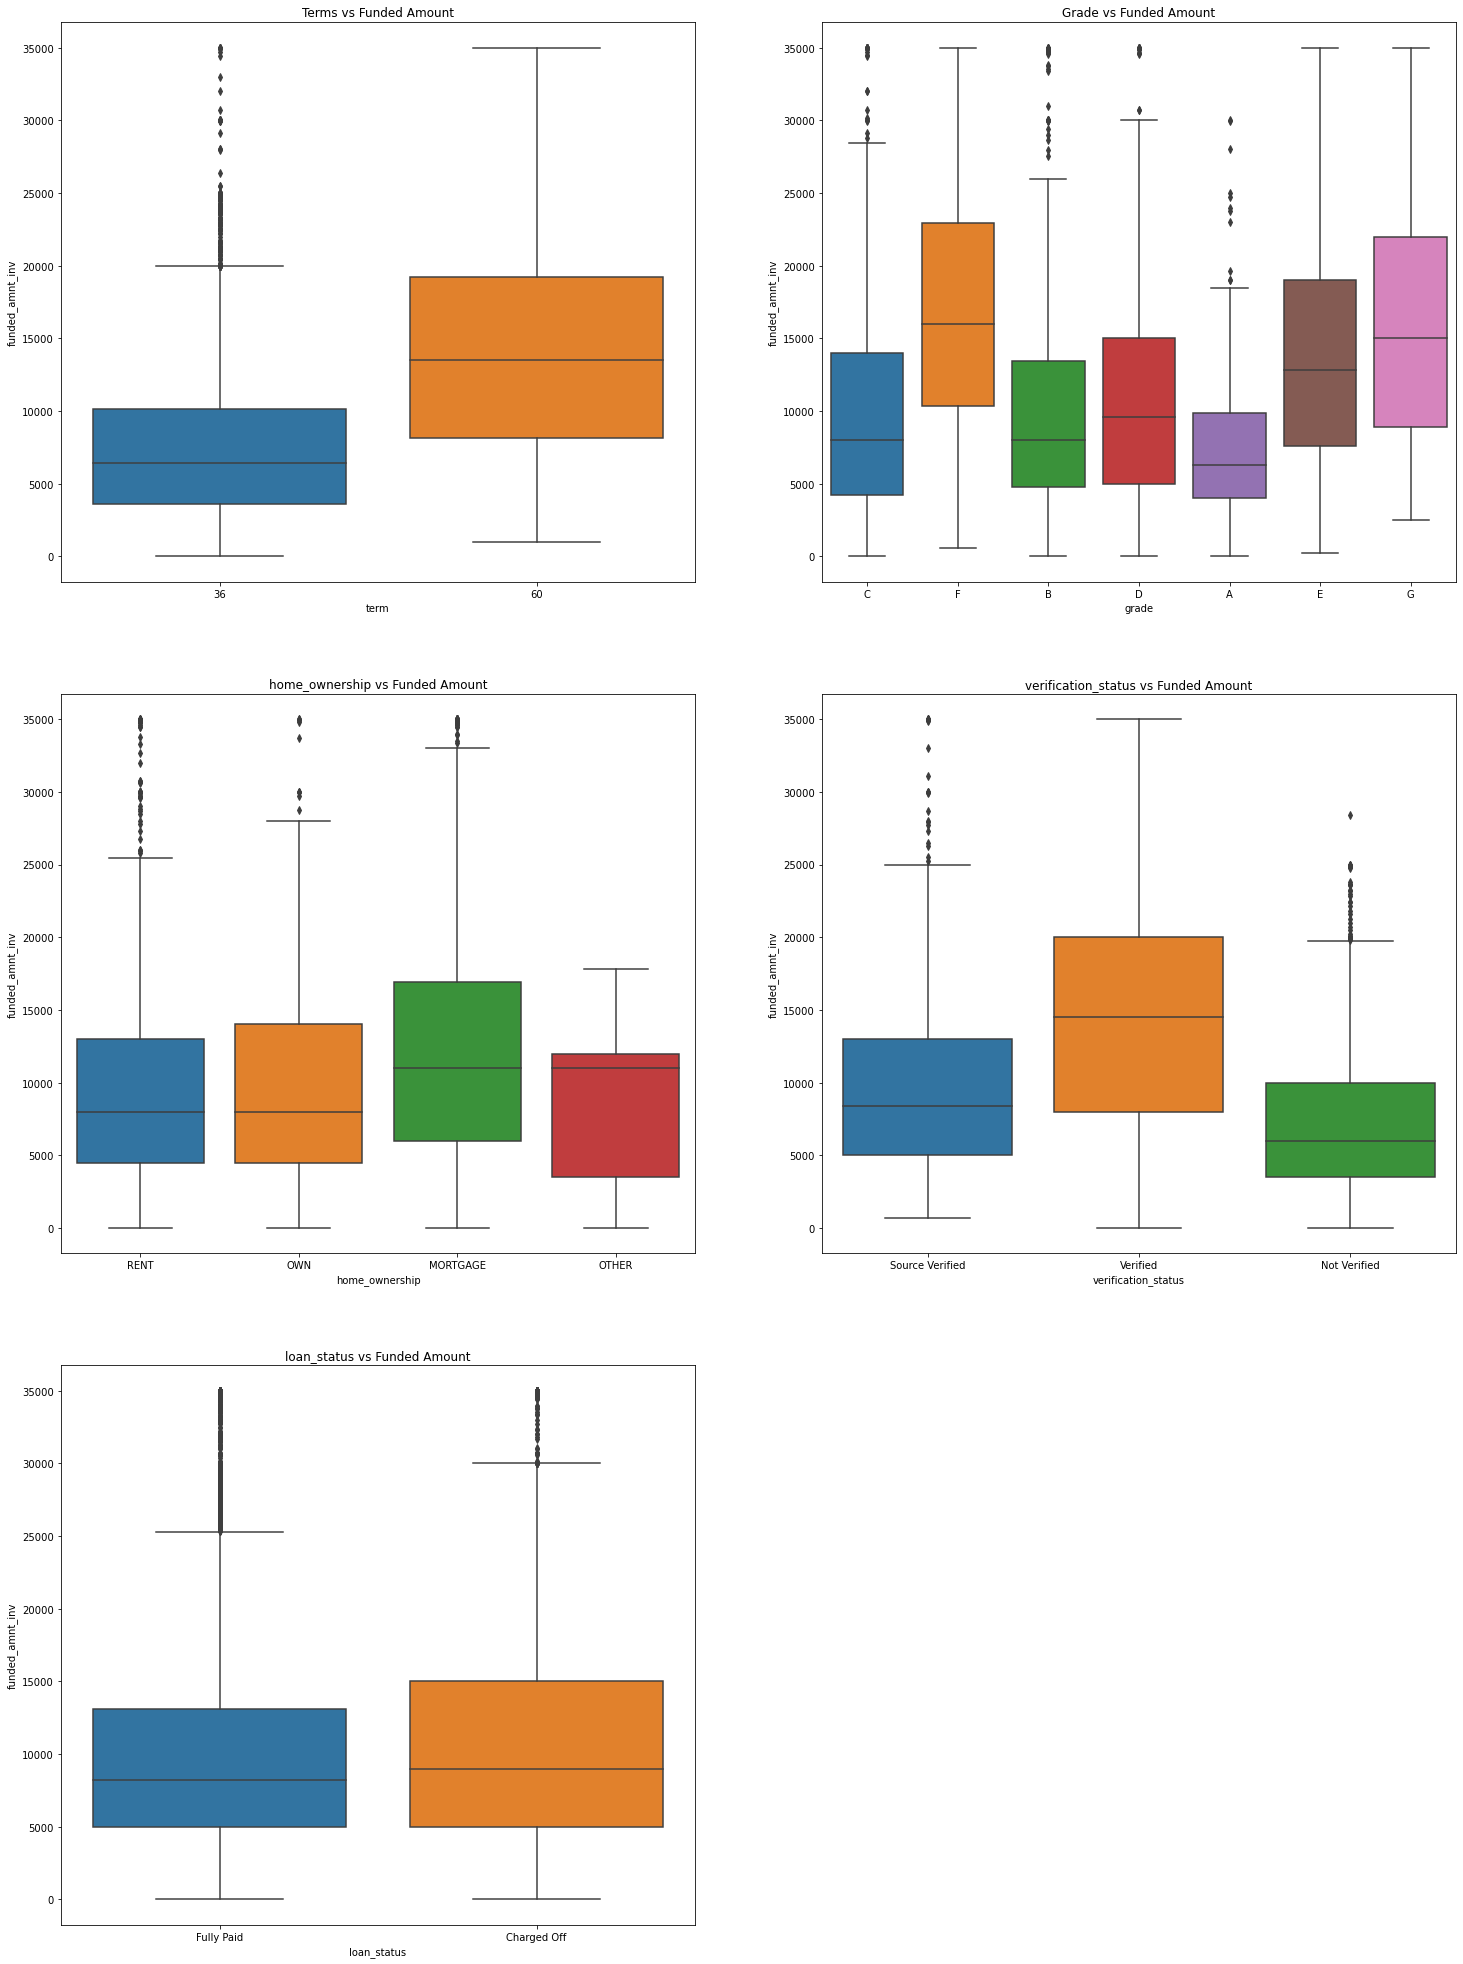

In [68]:
plt.figure(figsize=(25,35))

plt.subplot(321)
sns.boxplot(x='term', y=loan_df.funded_amnt_inv, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Terms vs Funded Amount')
plt.subplot(322)
sns.boxplot(x='grade', y=loan_df.funded_amnt_inv, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Grade vs Funded Amount')
plt.subplot(323)
sns.boxplot(x='home_ownership', y=loan_df.funded_amnt_inv, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('home_ownership vs Funded Amount')
plt.subplot(324)
plt.title('verification_status vs Funded Amount')
sns.boxplot(x='verification_status', y=loan_df.funded_amnt_inv, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(325)
sns.boxplot(x='loan_status', y=loan_df.funded_amnt_inv, data=loan_df)
plt.title('loan_status vs Funded Amount')
plt.show()

##### Analysis:
- The analysis for the funded amount investment is similar to the loan amount 

##### Interest rate

In [69]:
loan_df.int_rate= loan_df.int_rate.astype('float32')

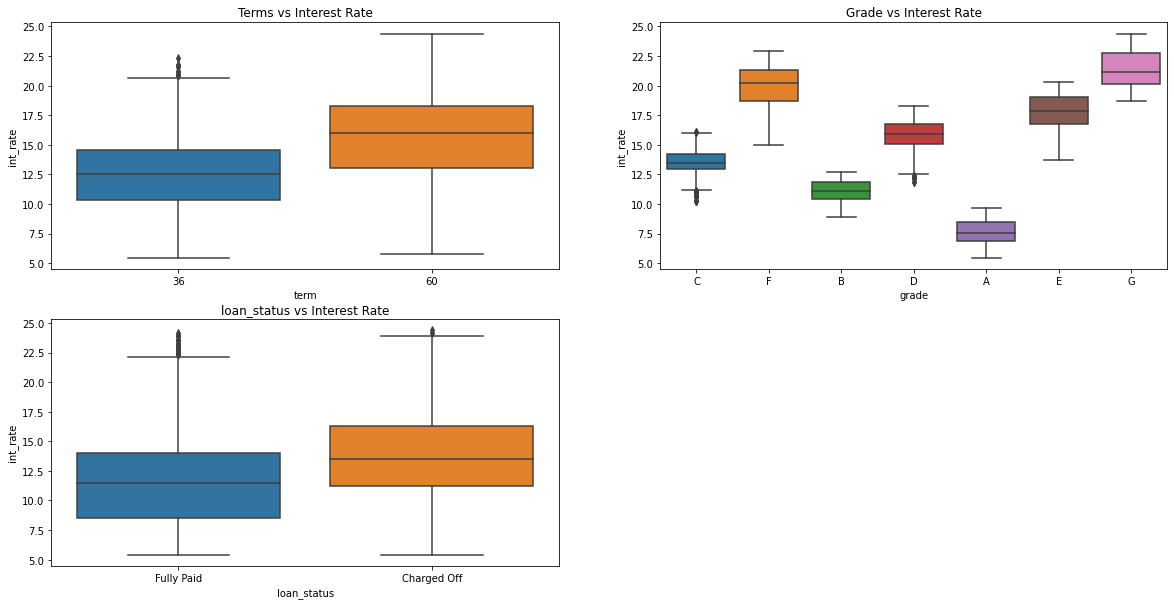

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(x='term', y=loan_df.int_rate, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Terms vs Interest Rate')
plt.subplot(222)
sns.boxplot(x='grade', y=loan_df.int_rate, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Grade vs Interest Rate')
plt.subplot(223)
sns.boxplot(x='loan_status', y=loan_df.int_rate, data=loan_df)
plt.title('loan_status vs Interest Rate')
plt.show()

##### Analysis:
- Interest rate is higher for the loans with higher tenure.
- As the grade reduces, the interest rate increases.
- Interest rate for charged off applicants is higher than the fully paid applicants.


##### Annual Income

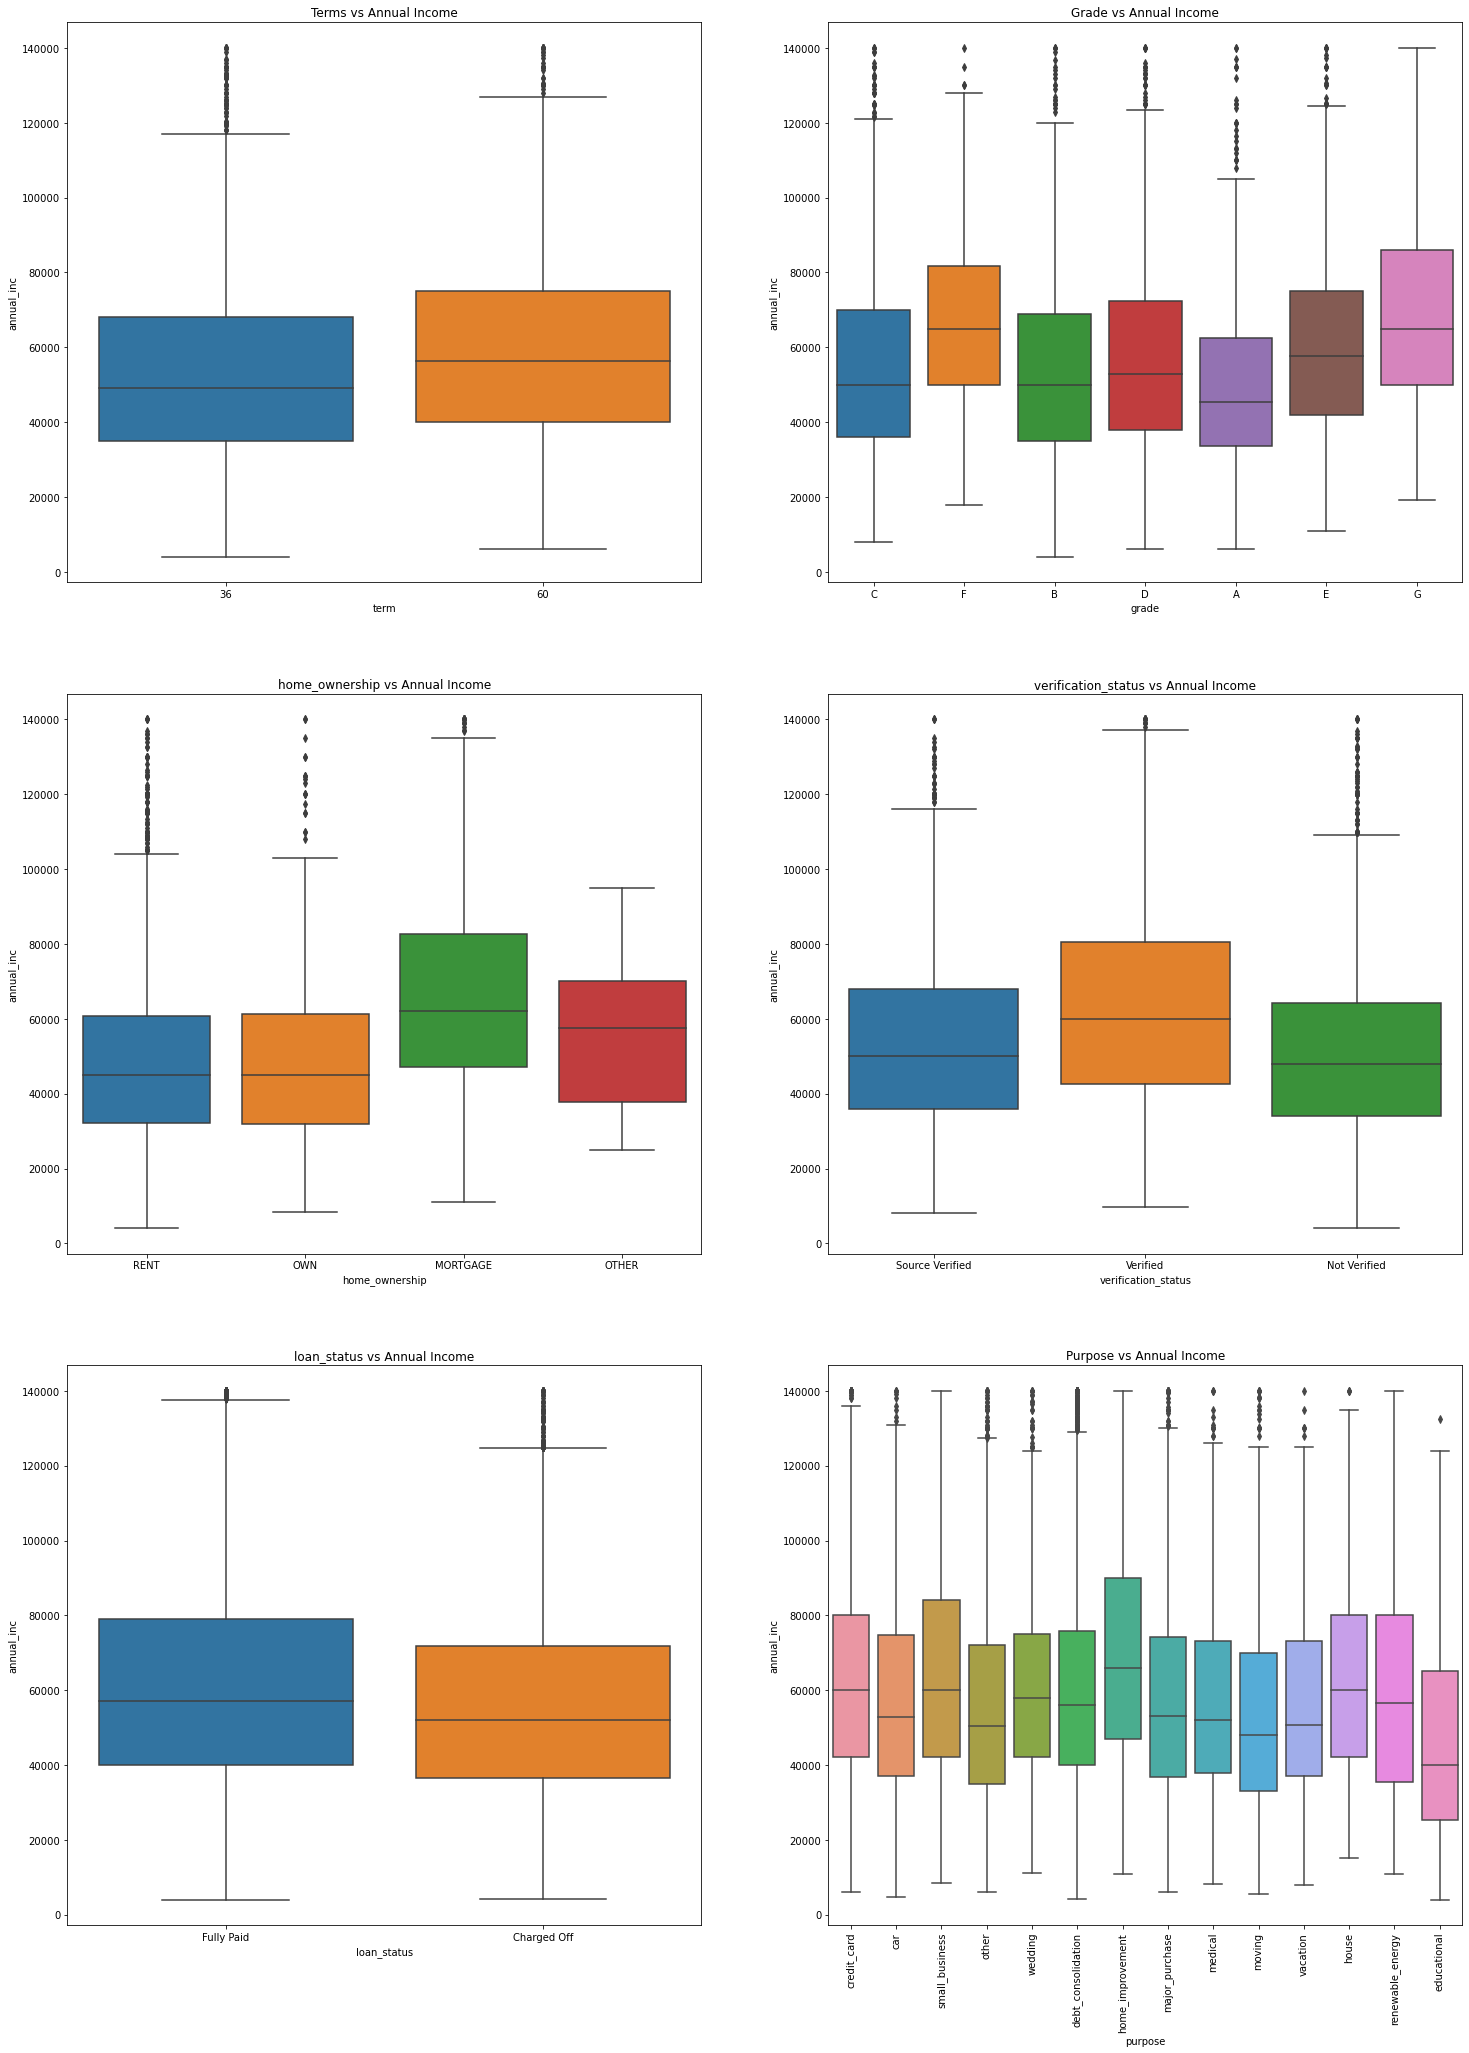

In [71]:
plt.figure(figsize=(25,35))

plt.subplot(321)
sns.boxplot(x='term', y=loan_df.annual_inc, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Terms vs Annual Income')
plt.subplot(322)
sns.boxplot(x='grade', y=loan_df.annual_inc, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Grade vs Annual Income')
plt.subplot(323)
sns.boxplot(x='home_ownership', y=loan_df.annual_inc, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('home_ownership vs Annual Income')
plt.subplot(324)
plt.title('verification_status vs Annual Income')
sns.boxplot(x='verification_status', y=loan_df.annual_inc, data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(325)
sns.boxplot(x='loan_status', y=loan_df.annual_inc, data=loan_df)
plt.title('loan_status vs Annual Income')
plt.subplot(326)
sns.boxplot(x='purpose', y=loan_df.annual_inc, data=loan_df)
plt.title('Purpose vs Annual Income')
plt.xticks(rotation=90)
plt.show()

##### Analysis:
- Annual income is higher for lower grades
- The applicants having mortgage house ownership have the highest annual income
- The applicants whose loan applications are verified have the highest annual income.
- Applicants with more salary generally applied for home-improvement,house, renewable_energy and small_businesses.